In [1]:
# predict Balance scale will tip to right or left depending upon the positons of weight on scale

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
bal_data=pd.read_csv("balance-scale.data", names=['Class_name','Left_weight','Left_distance','Right_weight','Right_distance'])

In [4]:
bal_data.head()

,Class_name,Left_weight,Left_distance,Right_weight,Right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [5]:
bal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
Class_name        625 non-null object
Left_weight       625 non-null int64
Left_distance     625 non-null int64
Right_weight      625 non-null int64
Right_distance    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [6]:
bal_data.shape

(625, 5)

In [7]:
bal_data.isnull().any().values

array([False, False, False, False, False])

In [8]:
bal_data.sample(10)

,Class_name,Left_weight,Left_distance,Right_weight,Right_distance
248,R,2,5,5,4
159,R,2,2,2,5
10,R,1,1,3,1
345,L,3,4,5,1
544,R,5,2,4,5
151,L,2,2,1,2
473,R,4,4,5,4
52,B,1,3,1,3
608,L,5,5,2,4
166,R,2,2,4,2


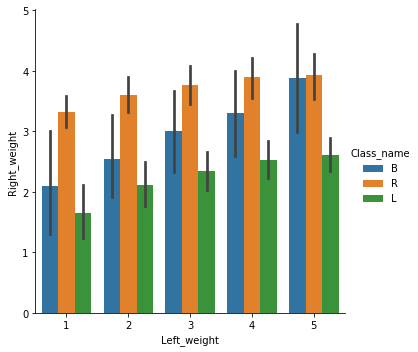

In [9]:
# lets plot the data 

sns.catplot(x='Left_weight',y='Right_weight', hue='Class_name',data=bal_data, kind='bar')

In [10]:
#no of L,B,R entries

bal_data.groupby('Class_name').size()

Class_name
B     49
L    288
R    288
dtype: int64

There are equal no. of left and right balance entries

In [11]:
# adding Left_weight*Left distance and Right_weight*Right_distance columns to df

bal_data['Lw*Ld']=bal_data['Left_weight']*bal_data['Left_distance']

In [12]:

bal_data['Rw*Rd']=bal_data['Right_weight']*bal_data['Right_distance']

In [13]:
bal_data

,Class_name,Left_weight,Left_distance,Right_weight,Right_distance,Lw*Ld,Rw*Rd
0,B,1,1,1,1,1,1
1,R,1,1,1,2,1,2
2,R,1,1,1,3,1,3
3,R,1,1,1,4,1,4
4,R,1,1,1,5,1,5
5,R,1,1,2,1,1,2
6,R,1,1,2,2,1,4
7,R,1,1,2,3,1,6
8,R,1,1,2,4,1,8
9,R,1,1,2,5,1,10


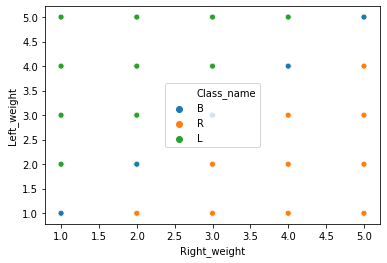

In [14]:
sns.scatterplot(x='Right_weight',y='Left_weight',hue='Class_name',data=bal_data)

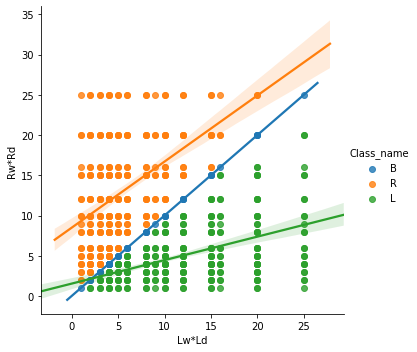

In [15]:
sns.lmplot(x='Lw*Ld',y='Rw*Rd',hue='Class_name',data=bal_data)

when the w*d is equal on both sides then scale is balanced. 

### Training data

Using following models and compare their accuracy:
    
    Logistic Regression
    Random Forest
    SVM
    KNN
    

In [16]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
# dividing the data into train and test sets

X=bal_data.drop(['Class_name','Lw*Ld','Rw*Rd'],axis=1)
y=bal_data['Class_name']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)


In [72]:
X.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
620    5
621    5
622    5
623    5
624    5
Name: Left_distance, Length: 625, dtype: int64

In [18]:
X_train.shape

(468, 4)

In [19]:
# lets see how many L,R,B in taining and testing datseta

y_train.groupby(y_train.values).count()

B     36
L    214
R    218
Name: Class_name, dtype: int64

In [20]:

y_test.groupby(y_test.values).count()

B    13
L    74
R    70
Name: Class_name, dtype: int64

So the split data has almost equal no. of left and right to get better predictions

### Logistic Regression

In [80]:
print("Fitting the LR classifier to the training set")
t0 = time()
param_grid = {'C': [10]}
lr=GridSearchCV(LogisticRegression(solver='lbfgs',multi_class='multinomial'),param_grid,cv=5)

lr.fit(X_train,y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(lr.best_estimator_)


Fitting the LR classifier to the training set
done in 0.204s
Best estimator found by grid search:
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [81]:
y_pred_lr=lr.predict(X_test)

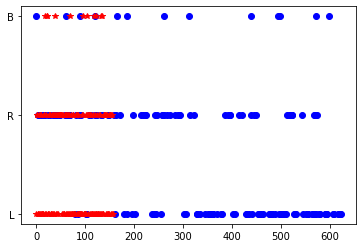

In [82]:
#plotting original test output vs predicted

plt.plot(y_test,'bo',y_pred_lr,'r*')

In [83]:

#  matrixes
print(classification_report(y_test,lr.predict(X_test),target_names=["B", "R", "L"]))
print(confusion_matrix(y_test, lr.predict(X_test),labels=["B", "R", "L"]))


              precision    recall  f1-score   support

           B       0.55      0.46      0.50        13
           R       0.88      0.96      0.92        74
           L       0.95      0.89      0.92        70

    accuracy                           0.89       157
   macro avg       0.79      0.77      0.78       157
weighted avg       0.88      0.89      0.88       157

[[ 6  1  6]
 [ 4 62  4]
 [ 1  2 71]]


### Randomforest

In [25]:
from sklearn.ensemble import RandomForestClassifier


In [27]:
print("Fitting the RF classifier to the training set")
t0 = time()
rf=RandomForestClassifier(n_estimators=100,random_state=3)
score_rf=rf.fit(X_train,y_train)
print("done in %0.3fs" % (time() - t0))

Fitting the RF classifier to the training set
done in 0.153s


In [28]:
y_pred_rf=rf.predict(X_test)

In [29]:
#  matrixes
print(classification_report(y_test,y_pred_rf,target_names=["B", "R", "L"]))
print(confusion_matrix(y_test, y_pred_rf,labels=["B", "R", "L"]))


              precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           R       0.96      0.93      0.95        74
           L       0.84      0.93      0.88        70

    accuracy                           0.85       157
   macro avg       0.60      0.62      0.61       157
weighted avg       0.83      0.85      0.84       157

[[ 0 11  2]
 [ 4 65  1]
 [ 4  1 69]]


### training using SVM

In [30]:

from sklearn.svm import SVC

In [54]:
print("Fitting the LR classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
sv=SVC(C=5,gamma='scale',random_state=4)
#sv = GridSearchCV(SVC(kernel='linear',class_weight='balanced',random_state=4),
  #                 param_grid, cv=5)

sv.fit(X_train,y_train)
print("done in %0.3fs" % (time() - t0))
#print("Best estimator found by grid search:")
#print(sv.best_estimator_)


Fitting the LR classifier to the training set
done in 0.009s


In [55]:
y_pred_sv=sv.predict(X_test)

In [56]:
print(classification_report(y_test,y_pred_sv,target_names=["B", "R", "L"]))

              precision    recall  f1-score   support

           B       0.67      0.62      0.64        13
           R       0.95      0.97      0.96        74
           L       0.96      0.94      0.95        70

    accuracy                           0.93       157
   macro avg       0.86      0.84      0.85       157
weighted avg       0.93      0.93      0.93       157



In [34]:

# confusion matrix
print(confusion_matrix(y_test, y_pred_sv,labels=["B", "R", "L"]))


[[12  1  0]
 [ 6 62  2]
 [ 1  2 71]]


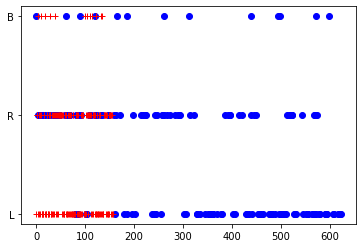

In [59]:
#plotting original test output vs predicted

plt.plot(y_test,'bo',y_pred_sv,'r+')

### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
print("Fitting the LR classifier to the training set")
t0 = time()
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print("done in %0.3fs" % (time() - t0))

Fitting the LR classifier to the training set
done in 0.042s


In [37]:
y_pred_knn=knn.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred_knn,target_names=["B", "R", "L"]))

              precision    recall  f1-score   support

           B       0.14      0.08      0.10        13
           R       0.91      0.92      0.91        74
           L       0.84      0.90      0.87        70

    accuracy                           0.84       157
   macro avg       0.63      0.63      0.63       157
weighted avg       0.81      0.84      0.83       157



In [39]:

# confusion matrix
print(confusion_matrix(y_test, y_pred_knn,labels=["B", "R", "L"]))


[[ 1  9  3]
 [ 3 63  4]
 [ 3  3 68]]


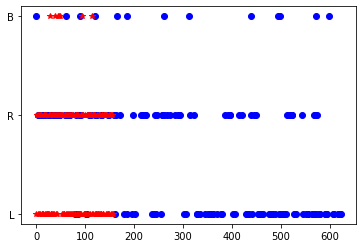

In [58]:
#plotting original test output vs predicted

plt.plot(y_test,'bo',y_pred_knn,'r*')

## Classifier                   Accuracy

Logistic Regression(C=10) 
 0.89

Random Forest           
0.85

SVM(C=5)                  
0.93

KNN                        
0.84